In [1]:
import os
from collections import defaultdict
from functools import partial
from copy import deepcopy

from cmp import run_programs
from matplotlib import pyplot as plt
import numpy as np

ldict = partial(defaultdict, list)

In [20]:
colors = {
    "python": "#008b8b",
    "python2": "#004b4b",
    "pypy2": "#303b3b",
    "nuitka": "#7fff00",
    "cython": "#ffa500",
    "cython_with_types": "#ef9500",
    "c++": "pink",
    "java": "brown",
    "lisp": "cyan",
    "clisp": "cyan",
    "node-js": "#006600",
}

In [2]:
results = run_programs(['sum']) #, executors=['java', 'c++'])

{'data': {'c++': [<Executor c++ [100000]: 0.006044>,
                  <Executor c++ [600000]: 0.007109>,
                  <Executor c++ [1100000]: 0.008028>,
                  <Executor c++ [1600000]: 0.009168>,
                  <Executor c++ [2100000]: 0.009709>],
          'cython': [<Executor cython [100000]: 0.031881>,
                     <Executor cython [600000]: 0.064472>,
                     <Executor cython [1100000]: 0.097522>,
                     <Executor cython [1600000]: 0.124406>,
                     <Executor cython [2100000]: 0.158116>],
          'cython_with_types': [<Executor cython_with_types [100000]: 0.033143>,
                                <Executor cython_with_types [600000]: 0.070189>,
                                <Executor cython_with_types [1100000]: 0.104795>,
                                <Executor cython_with_types [1600000]: 0.139700>,
                                <Executor cython_with_types [2100000]: 0.175953>],
          'java': [<Exe

In [22]:
def plot_result(program, data, normalize=False):
    if not data:
        return

    plt.title('program: %s' % program)
    
    if len(list(data.values())[0]) == 1:
        plt.barh([d[0] for d in data], width=[d[1] for d in data], color=[colors[d[0]] for d in data], )
        plt.xlabel('seconds')
        plt.tight_layout()
    else:
        # print(data)
        plt.xlabel('arguments')
        plt.ylabel('time')
        for executor, values in data.items():  
            x, y = np.array([(v.args[0], v.time) for v in values]).T
            # print(y, x)
            if normalize:
                y -= y[0]
            plt.plot(x, y, label=executor, color=colors[executor])
        plt.legend() 
    plt.savefig(os.path.join('etc/img/', '%s-%d.png' %(program, int(normalize))))
    plt.show()

In [27]:
def plot_results(results, normalize):
    plt.figure(figsize=(15, 8))
    for result in results:
        plot_result(**result, normalize=normalize)

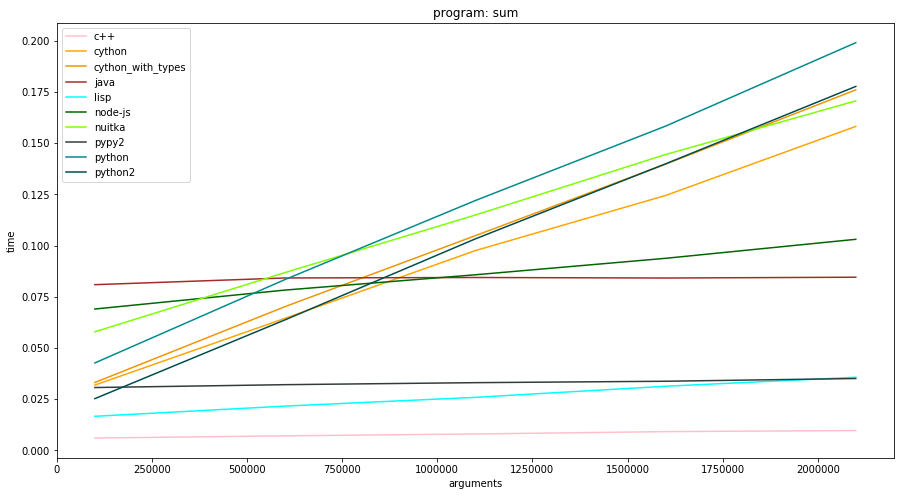

In [28]:
plot_results(results, False)

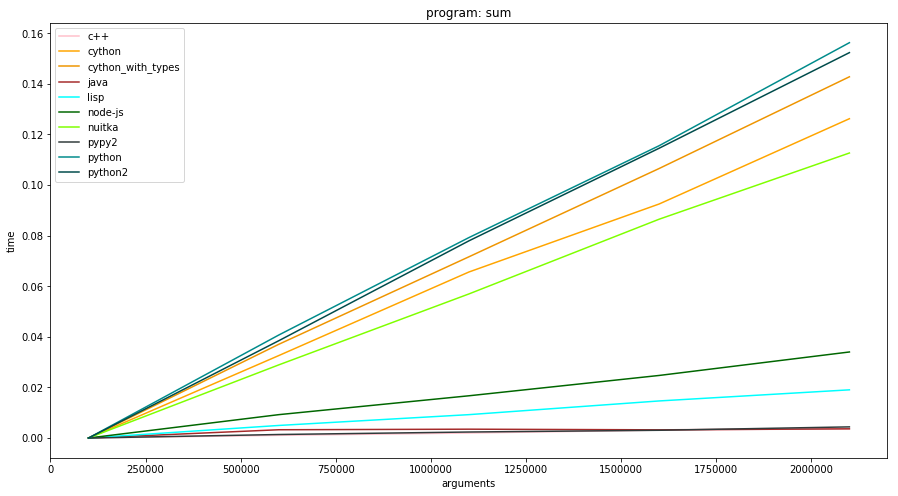

In [29]:
plot_results(results, True)